In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #For Data Visualization 
import seaborn as sns

In [4]:
df=pd.read_csv("C:/Users/f/Downloads/Python_Diwali_Sales_Analysis/Python_Diwali_Sales_Analysis/Diwali Sales Data.csv", encoding='unicode_escape')

In [7]:
df.shape

(11251, 15)

In [8]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 966.9+ KB


In [12]:
#'Deleting the Columns like Status and unnamed1 as they are Empty'
df=df.drop(['Status','unnamed1'],axis=1)

In [17]:
#Check the Null Values of each Columns
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [18]:
df.dropna(inplace=True)

In [20]:
#Change Data Type of Amount Colummn to Integer Type
df['Amount']=df['Amount'].astype('int')

In [21]:
df['Amount'].dtype

dtype('int32')

In [22]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [24]:
#Renaming of Columns..
df.rename(columns={'Marital_Status': 'Marriage'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marriage,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [29]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis 

**Gender**

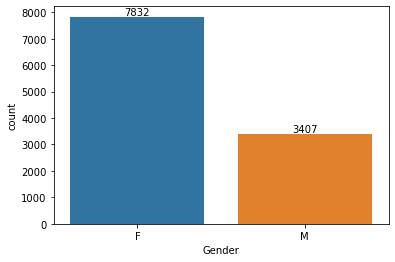

In [35]:
ax=sns.countplot(x='Gender',data=df)

#Putting label on the bars..
for bars in ax.containers:
    ax.bar_label(bars)

In [38]:
#Grouping the Data using Gender to find the Total Amount of pruchases acc. to gender..
sales_gen= df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

<AxesSubplot:xlabel='Gender', ylabel='Amount'>

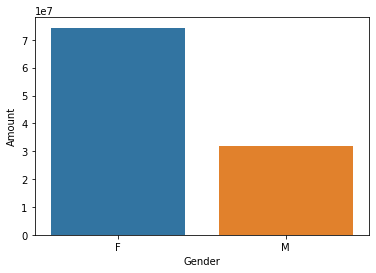

In [39]:
sns.barplot(x='Gender',y='Amount',data=sales_gen)

From above Graphs we conclude that "Female" buyers are more and their purchasing power is also more than "Males".

**AGE**

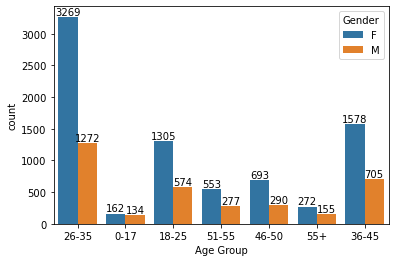

In [44]:
ax=sns.countplot(x='Age Group',data=df,hue='Gender')

#Print labels uopn bars..
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

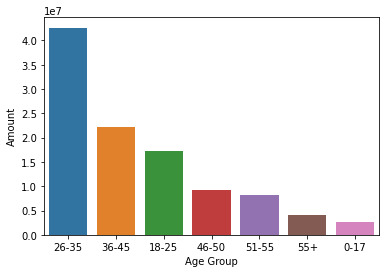

In [48]:
sales_age= df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Age Group',y= 'Amount',data=sales_age)

From above graphs we conclude that most buyers are from age group 26-35 and that too Females.

**State**

<AxesSubplot:xlabel='State', ylabel='Orders'>

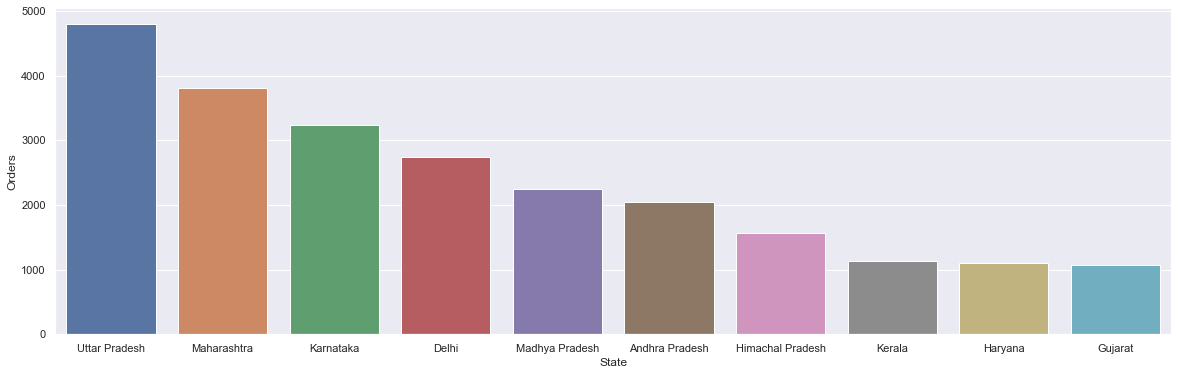

In [67]:
#Total Numbers od Order from Top 10 states..
states=df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,6)})
sns.barplot(x='State',y='Orders',data=states)

<AxesSubplot:xlabel='State', ylabel='Amount'>

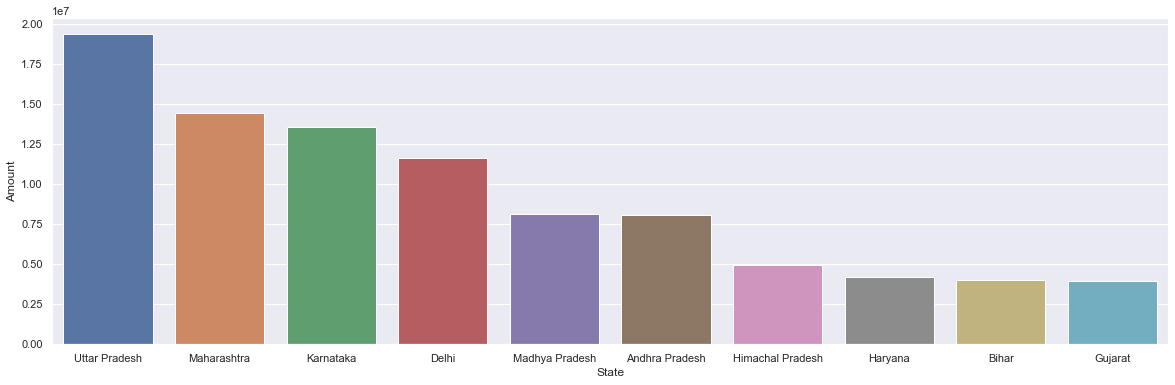

In [69]:
#Total Amount from Top 10 states..
states=df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,6)})
sns.barplot(x='State',y='Amount',data=states)

From above Graph we conclude that most of the Order and Total Sales are from "Uttar Pradesh","Maharastra" and "Karnataka" respectively.

**Marital Status**

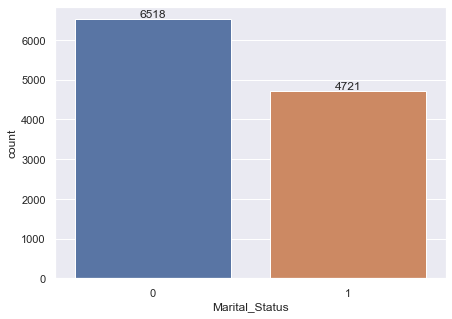

In [77]:
ax=sns.countplot(x='Marital_Status',data= df)

sns.set(rc={'figure.figsize':(5,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Marital_Status', ylabel='Amount'>

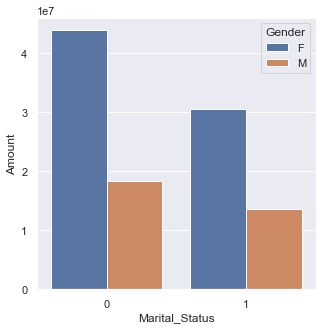

In [81]:
sales=df.groupby(['Marital_Status','Gender'] , as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x='Marital_Status', y= 'Amount',data= sales,hue='Gender')

Most of the Buyers are Married Women. They also have high purchasing power.

**Occupation**

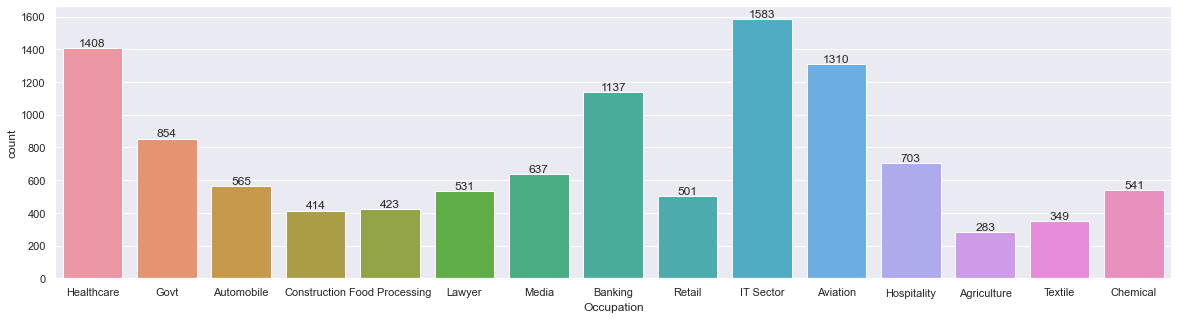

In [83]:
sns.set(rc={'figure.figsize':(20,5)})
ax=sns.countplot(x='Occupation',data=df)

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

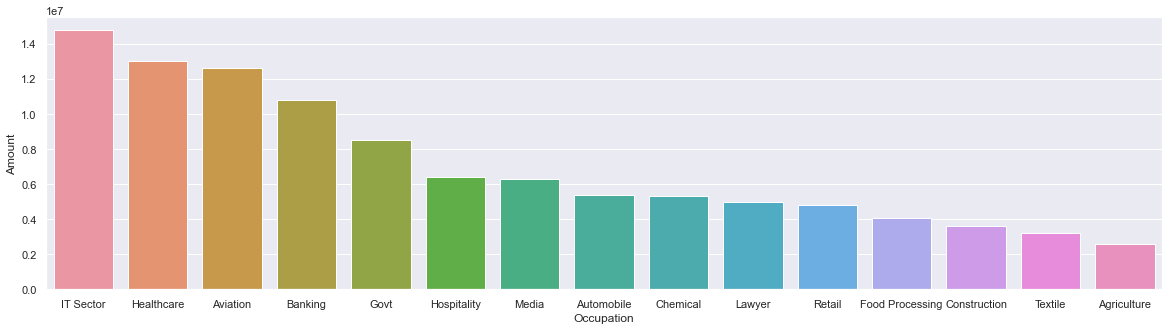

In [86]:
sales=df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Occupation', y= 'Amount',data=sales)

Most of the Buyers are from IT Sectors , Healthcare and Aviation respectively.

**Product Category**

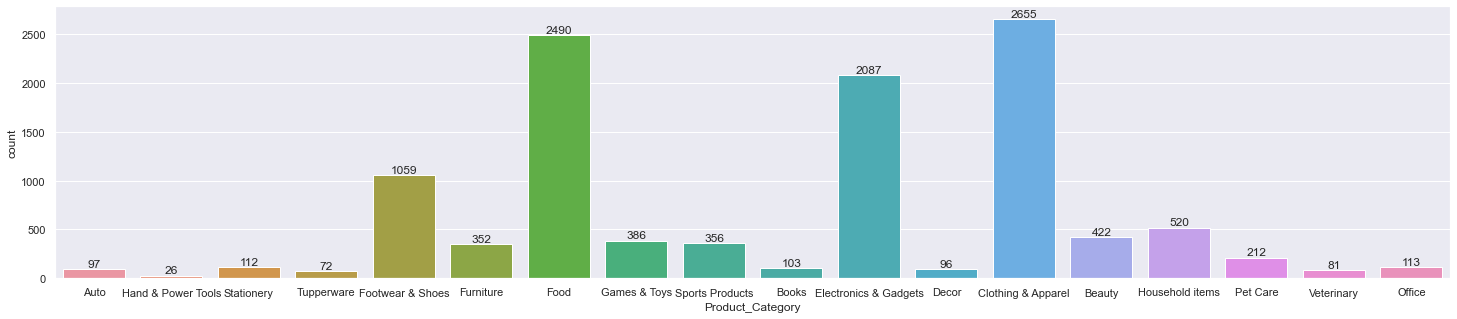

In [97]:
sns.set(rc={'figure.figsize':(25,5)})
ax=sns.countplot(x='Product_Category',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

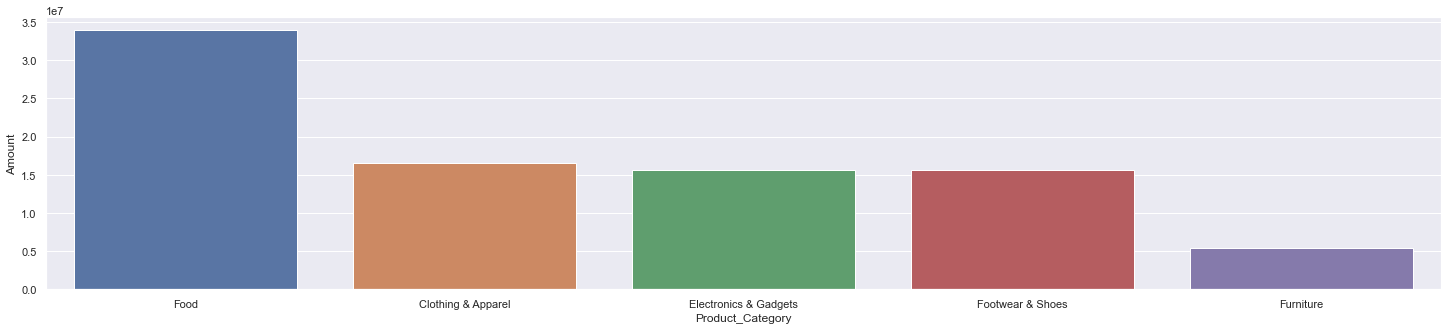

In [93]:
sales=df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)
sns.barplot(x='Product_Category',y='Amount',data=sales)

Most of the Sold Products are from Food Category.

<AxesSubplot:xlabel='Product_ID', ylabel='Orders'>

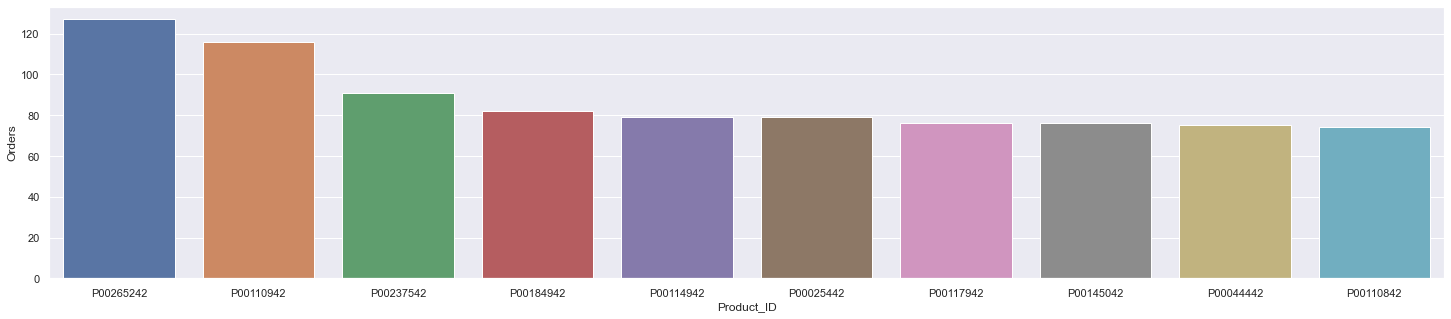

In [99]:
#Finding Top 10 most selling Products by Product ID
sales=df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.barplot(x='Product_ID', y = 'Orders',data=sales)

# Conclusion:

From the above Analysis We conclude that **"Married Women"** of Age group '26-35' from **"Uttar Pradesh" , "Maharastra" and "Karnataka"** working in **"IT Sector", "Healthcare" and "Aviation"** are more likely to buy products from **"Food" , "Clothing" and "Electronics Category". 